In [17]:
import tensorflow as tf
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')

In [18]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [19]:
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

In [20]:
trainImages = trainImages.reshape((60000, 28, 28, 1))
testImages = testImages.astype("float32") / 255

trainLabels = to_categorical(trainLabels)


testImages = testImages.reshape((10000, 28, 28, 1))
testImages = testImages.astype("float32") / 255

testLabels = to_categorical(testLabels)

In [21]:
from keras import layers, models

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [24]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [25]:
history = model.fit(trainImages, trainLabels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.3410 - accuracy: 0.9402
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0599 - accuracy: 0.9826
Epoch 3/5
938/938 [==============================] - 13s 13ms/step - loss: 0.0438 - accuracy: 0.9875
Epoch 4/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0346 - accuracy: 0.9904
Epoch 5/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0300 - accuracy: 0.9920


In [26]:
testLoss, testAcc = model.evaluate(testImages, testLabels)

313/313 [==============================] - 1s 4ms/step - loss: 2.3033 - accuracy: 0.0974


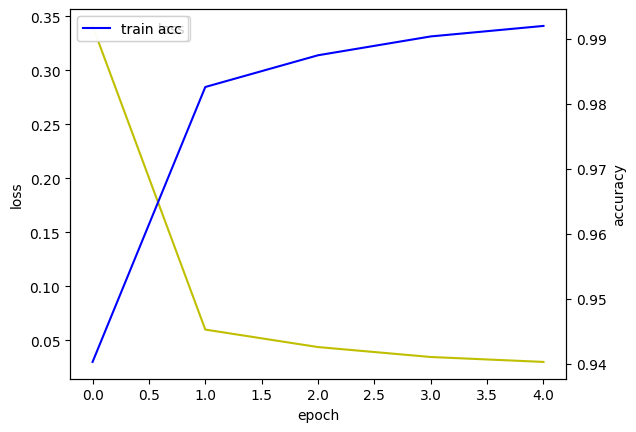

In [28]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [30]:
history.history

{'loss': [0.34097588062286377,
  0.05993574857711792,
  0.043763667345047,
  0.034567296504974365,
  0.03001384623348713],
 'accuracy': [0.9402499794960022,
  0.9825666546821594,
  0.9874500036239624,
  0.9903500080108643,
  0.9919666647911072]}